# Check water summary files against the pyramids level-0 files

### the pyramids/{WaterObservations, ClearObservations,WaterSummary}/0

Fei Zhang 2016-01-23

In [5]:
import sys,os,time


WofsRunDir='/g/data/u46/wofs/water_2015Q1'

# which cell?
checkcell= '135_-012'
checkcell= '145_-017'  
checkcell= '145_-026'

water_summary_file=os.path.join(WofsRunDir,'summaries','waterSummary_'+ checkcell+'.tiff')
pyramids_wobs=os.path.join(WofsRunDir,'pyramids/WaterObservations/0', 'water_obs_'+checkcell+'.tiff')


In [2]:
print water_summary_file, pyramids_wobs

/g/data/u46/wofs/water_2015Q1/summaries/waterSummary_145_-018.tiff /g/data/u46/wofs/water_2015Q1/pyramids/WaterObservations/0/water_obs_145_-018.tiff


In [21]:
#!ls -l  /g/data/u46/wofs/water_zf2/summaries/waterSummary_135_-012.tiff 
#!ls -l /g/data/u46/wofs/water_zf2/pyramids/WaterObservations/0/water_obs_135_-012.tiff

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as spys

import gdal
from gdalconst import *

def readtiff(geofile):


    # Register drivers
    gdal.AllRegister()

    # Open image
    ds = gdal.Open(geofile, GA_ReadOnly)

    if ds is None:
        raise Exception('Could not open image file %s' %(geofile))
        

    # get image size
    rows = ds.RasterYSize
    cols = ds.RasterXSize
    numbands = ds.RasterCount

#     print 'rows= %s, cols= %s, number of bands = %s' %(str(rows), str(cols), str(numbands))
#     print ("********************")

    # get projection and resolution info of the raster
    proj = ds.GetProjection()

    transform = ds.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = transform[5]

#     print ("Projection Info = %s"%(proj))
#     print ("xOrigin = %s,  yOrigin = %s "%(xOrigin, yOrigin))
#     print ("pixelWidth = %s,  pixelHeight = %s "%(pixelWidth, pixelHeight))
    
    # Read the data into numpy array
    numarray=[]
    for i in range(1,numbands+1):
        band =ds.GetRasterBand(i)  # the very first band is i=1
        data = band.ReadAsArray(0,0,cols,rows) #.astype('float32')
        numarray.append(data)
    
    # Once we're done, close properly the dataset
    ds = None
    
    return numarray


#if __name__ == "__main__":
#    infile = sys.argv[1]
#    nparlist = readtiff(infile)

In [6]:
watsum=readtiff(water_summary_file)

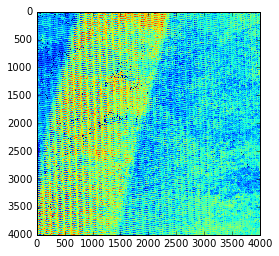

In [8]:
watsum1=watsum[1]
plt.imshow(watsum1)

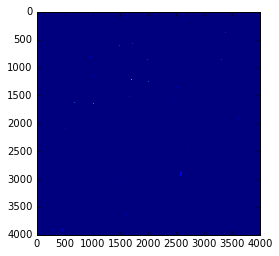

In [10]:
pyrawobs=readtiff(pyramids_wobs)
plt.imshow(pyrawobs[0])

In [8]:
# test if the WaterObservation is the same as the band1 of the water summary?
(watsum1 == pyrawobs[0]).all()

True

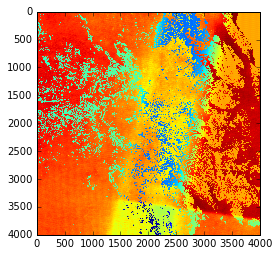

In [9]:
# water sumaries band-2
watsum2=watsum[1]
plt.imshow(watsum2)

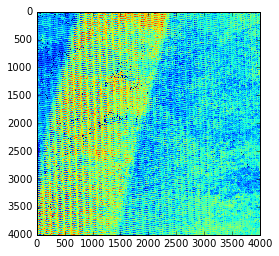

In [11]:
pyramids_clearobs = os.path.join(WofsRunDir,'pyramids/ClearObservations/0', 'clear_obs_'+checkcell+'.tiff')
pyraclobs=readtiff(pyramids_clearobs)
plt.imshow(pyraclobs[0])

In [11]:
# test if the ClearObservation is the same as the band2 of the water summary?
(watsum2 == pyraclobs[0]).all()

True

# Water Summary Percentage

In [12]:
# my calculation accoring to summaries tiles

my_watsum_pct =(100.0*watsum1)/watsum2

plt.imshow(my_watsum_pct)

NameError: name 'watsum2' is not defined

In [13]:
np.sum(my_watsum_pct)

3207668.8578480361

## Pyramids Water Summary File

/g/data/u46/wofs/water_2015Q1/pyramids/WaterSummary/0/percentWater_145_-026.tiff


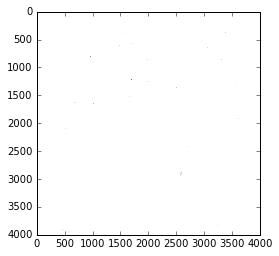

In [ ]:
pyramids_watsum_pct = os.path.join(WofsRunDir,'pyramids/WaterSummary/0', 'percentWater_'+checkcell+'.tiff')
print  pyramids_watsum_pct

pyra_watsum_pct=readtiff(pyramids_watsum_pct)
plt.imshow(pyra_watsum_pct[0], cmap='Greys')

In [14]:
print type(pyra_watsum_pct[0])
print pyra_watsum_pct[0]
print np.sum(pyra_watsum_pct[0])


<type 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
322236.0


In [16]:
# where water summary percentage no-zero
np.where( pyra_watsum_pct[0] != 0.0 )

(array([   0,    0,    0, ..., 3999, 3999, 3999]),
 array([ 129,  679,  680, ..., 3994, 3997, 3998]))

In [17]:
# where water summary percentage >= 100 ?  Nowhere
np.where( pyra_watsum_pct[0] >= 86.0 )

(array([], dtype=int64), array([], dtype=int64))

In [18]:
# very file the pixel value use the above row and col numbers.
print pyra_watsum_pct[0][2613,3982]
print pyra_watsum_pct[0][3714,3749]

print pyra_watsum_pct[0][2613,3749] # not this pix

0.0
0.0
0.0


# Statistcs of the water summary image pixel values

In [15]:
#import scipy.stats as spys
spys.describe(pyra_watsum_pct[0][3000,:])  # pick a row

spys.describe(pyra_watsum_pct[0].flat)  # into 1D

DescribeResult(nobs=16000000, minmax=(0.0, 100.0), mean=0.020139752, variance=1.0238035, skewness=71.81011962890625, kurtosis=6038.913222049316)

In [16]:
spys.describe(my_watsum_pct.flat)  # same as above

NameError: name 'my_watsum_pct' is not defined

# Conclusions

For the tested cell 135_-012, all tests are positive: 

The 3 directories in the 0-level pyramids/{WaterObservations, ClearObservations,WaterSummary}/0 are the same pixel data in the summaries dir. The 1-7 levels are pyramids algorithm outputs not verified here.

Which means, only 2 dirs (the Confidence and Filtered) are from confidence results. Let's look them below.

/g/data/u46/wofs/water_zf2/pyramids/WaterSummaryFiltered/0/confidenceFilteredPercentWater_145_-018.tiff


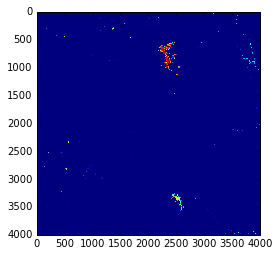

In [4]:
pyramids_watsum_ftd = os.path.join(WofsRunDir,'pyramids/WaterSummaryFiltered/0', 'confidenceFilteredPercentWater_'+checkcell+'.tiff')
print  pyramids_watsum_ftd

pyra_watsum_ftd=readtiff(pyramids_watsum_ftd)
plt.imshow(pyra_watsum_ftd[0])

In [5]:
spys.describe(pyra_watsum_ftd[0].flat)

DescribeResult(nobs=16000000, minmax=(0.0, 59.659092), mean=0.19778447, variance=8.1068764, skewness=16.496212005615234, kurtosis=285.65218661907085)

In [13]:
dif = np.where(pyra_watsum_ftd[0] != pyra_watsum_pct[0])

In [15]:
print len(dif[0]), len(dif[1])  # row and col positions which are masked out because of low confidence.

247081 247081


## The Confidence Images

/g/data/u46/wofs/water_zf2/pyramids/Confidence/0/confidence_145_-018.tiff


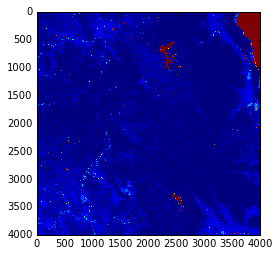

In [16]:
pyramids_confid = os.path.join(WofsRunDir,'pyramids/Confidence/0', 'confidence_'+checkcell+'.tiff')
print  pyramids_confid

pyra_confid=readtiff(pyramids_confid)
plt.imshow(pyra_confid[0])

In [17]:
spys.describe(pyra_confid[0].flat)

DescribeResult(nobs=16000000, minmax=(0, 99), mean=4.0987069375000003, variance=198.84799743098907, skewness=6.212987602869572, kurtosis=38.49168545475928)

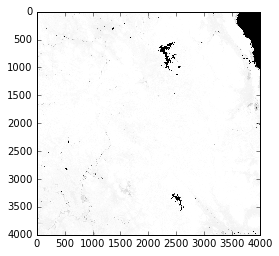

In [19]:
plt.imshow(pyra_confid[0], cmap='Greys')

In [24]:
!ls -l

total 3744
-rw-r--r-- 1 fxz547 v10  339676 Jan 22 12:14 130_-016.log
-rw-r--r-- 1 fxz547 v10  223923 Jan 22 16:01 145_-017.log
-rw-r--r-- 2 fxz547 v10 2381510 Jan 15 09:48 CRCDockertutorial.ipynb
-rw-r--r-- 1 fxz547 v10  493921 Jan 24 10:18 check_water_summaries.ipynb
-rw-r--r-- 1 fxz547 v10    4179 Jan 15 11:18 different_commands.ipynb
-rw-r--r-- 1 fxz547 v10    6916 Jan 15 11:39 matplotfin.py
-rw-r--r-- 1 fxz547 v10    7552 Jan 14 19:48 mynb1-magic-commands.ipynb
-rw-r--r-- 1 fxz547 v10   10447 Jan 14 19:53 mynb2-postgres.ipynb
-rw-r--r-- 1 fxz547 v10     688 Jan 15 11:19 py4finotebook.ipynb
-rw-r--r-- 1 fxz547 v10    4162 Jan 22 15:16 summarise_water_extents.py
-rw-r--r-- 1 fxz547 v10    3872 Jan 22 14:36 summarise_water_extents.pyc
-rw-r--r-- 1 fxz547 v10  332514 Jan 24 08:10 wofs-extents2summary.ipynb
